In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving online_retail.xlsx to online_retail.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['online_retail.xlsx']))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
order_wise = df.dropna()

In [ ]:
order_wise.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
from datetime import datetime
order_wise["InvoiceDate"] = order_wise["InvoiceDate"].dt.date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
order_wise.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [ ]:
order_wise.rename(columns = {'InvoiceNo': 'invoice_no',
                            'StockCode': 'stock_code',
                            'Description': 'description',
                             'Quantity': 'quantity',
                             'InvoiceDate': 'invoice_date',
                             'UnitPrice': 'unit_price',
                             'CustomerID': 'customer_id',
                             'Country': 'country'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
order_wise.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [ ]:
order_wise["sales_value"] = order_wise["quantity"] * order_wise["unit_price"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import datetime
max_date = max(order_wise.invoice_date) + datetime.timedelta(days=1)

In [ ]:
rfm = order_wise.groupby(['customer_id']).agg({'invoice_date' : lambda x: (max_date - x.max()).days, 'invoice_no': 'count', 'sales_value': 'sum'})

In [ ]:
rfm.rename( columns = {'invoice_date': 'recency',
                       'invoice_no': 'frequency',
                       'sales_value': 'monetary_value'}, inplace = True)

In [ ]:
rfm.head()

,recency,frequency,monetary_value
customer_id,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [ ]:
#Treating Outliers for monetary_value:

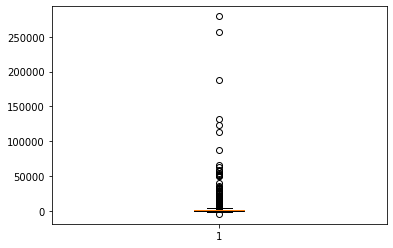

In [ ]:
plt.boxplot(rfm.monetary_value)
Q1 = rfm.monetary_value.quantile(0.25)
Q3 = rfm.monetary_value.quantile(0.75)
IQR = Q3-Q1
rfm = rfm[(rfm.monetary_value >= (Q1-1.5*IQR)) & (rfm.monetary_value <= (Q3+1.5*IQR))]

In [ ]:
#Treating Outliers for frequency:

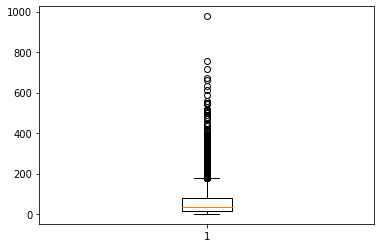

In [ ]:
plt.boxplot(rfm.frequency)
Q1 = rfm.frequency.quantile(0.25)
Q3 = rfm.frequency.quantile(0.75)
IQR = Q3-Q1
rfm = rfm[(rfm.frequency >= (Q1-1.5*IQR)) & (rfm.frequency <= (Q3+1.5*IQR))]

In [ ]:
#Treating outliers for recency:

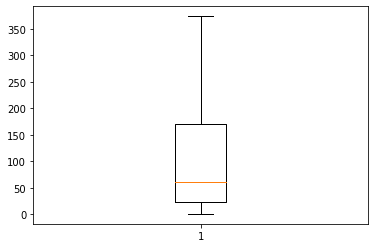

In [ ]:
plt.boxplot(rfm.recency)
Q1 = rfm.recency.quantile(0.25)
Q3 = rfm.recency.quantile(0.75)
IQR = Q3-Q1
rfm = rfm[(rfm.recency >= (Q1-1.5*IQR)) & (rfm.recency <= (Q3+1.5*IQR))]

In [ ]:
rfm.head(10)

,recency,frequency,monetary_value
customer_id,,,
12346.0,326,2,0.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
12352.0,37,95,1545.41
12353.0,205,4,89.00
12354.0,233,58,1079.40
12355.0,215,13,459.40
12356.0,23,59,2811.43


In [ ]:
#Scaling the data:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm)
rfm_norm = scaler.transform(rfm)

In [ ]:
rfm_norm = pd.DataFrame(rfm_norm)
rfm_norm.columns = ['recency', 'frequency', 'monetary_value']
rfm_norm.head()

,recency,frequency,monetary_value
0,2.131196,-1.070949,-1.041614
1,-0.277581,-0.375498,1.385298
2,-0.826782,0.631707,1.331702
3,1.986670,-0.711233,-0.590055
4,-0.653350,1.159290,1.045238


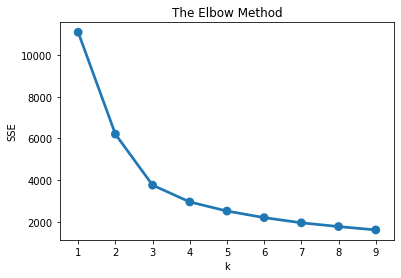

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1,10):
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(rfm_norm)
  sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


In [ ]:
#Fitting the model:

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(rfm_norm)
model.labels_.shape

(3697,)

In [ ]:
rfm["Cluster"] = model.labels_
rfm.groupby('Cluster').agg({
    'recency':'mean',
    'frequency':'mean',
    'monetary_value':['mean', 'count']}).round(2)


recency frequency monetary_value      
           mean      mean           mean count
Cluster                                       
0         52.99     34.10         557.87  1937
1         45.11    109.59        1844.38   788
2        256.48     20.67         326.92   972

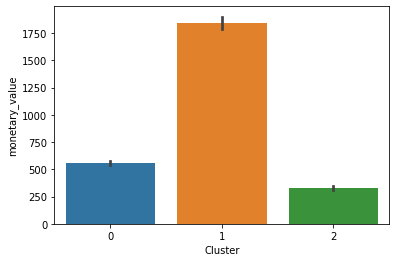

In [ ]:
sns.barplot(x=rfm.Cluster, y=rfm.monetary_value)

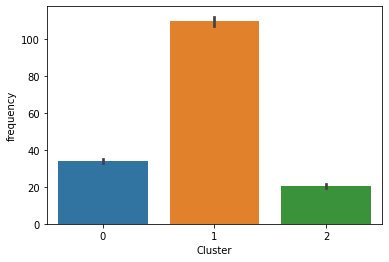

In [ ]:
sns.barplot(x=rfm.Cluster, y=rfm.frequency)

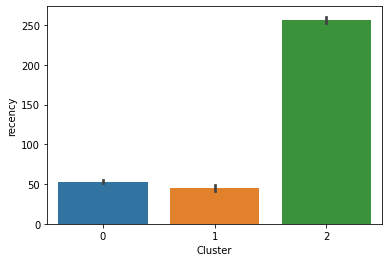

In [ ]:
sns.barplot(x=rfm.Cluster, y=rfm.recency)

Seeing the data and barcharts it could be observed that cluster 1 is frequent, spend more, and they buy the product recently. 
Therefore, it could be inferred as a cluster of loyal customers.

The cluster 0 is less frequent, spend less, but bought the product recently. Therefore, it could be inferred as cluster of new customers.

Finally, the cluster 2 is less frequent, spends less, bought the product quite a long time back. So it could be inferred as a cluster of Churned customers.